In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mercadona scrap definitivo.csv to Mercadona scrap definitivo.csv


In [ ]:
mercadona_data = pd.read_csv("/content/Mercadona scrap definitivo.csv")

In [ ]:
mercadona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_cat              4983 non-null   int64  
 1   subcategoria        4983 non-null   object 
 2   ID_subcat           4983 non-null   int64  
 3   categoria_producto  4983 non-null   object 
 4   ID_pro              4983 non-null   float64
 5   Nombre              4983 non-null   object 
 6   Precio              4983 non-null   float64
 7   Precio_unidad       4983 non-null   float64
 8   Unidad_medida       4983 non-null   object 
 9   Fecha_actual        4983 non-null   object 
 10  Marca               4983 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 428.4+ KB


In [ ]:
mercadona_data.describe()

,ID_cat,ID_subcat,ID_pro,Precio,Precio_unidad
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,142.055388,531.944812,41321.215071,7.499805,13.217714
std,103.898735,183.850885,25302.982862,87.058699,93.022541
min,27.000000,101.000000,1393.000000,0.170000,0.000000
25%,72.000000,360.000000,19771.000000,1.500000,2.330000
50%,135.000000,518.000000,39100.000000,2.250000,5.180000
75%,196.000000,677.000000,63204.000000,3.900000,10.000000
max,897.000000,898.000000,95730.000000,2965.050000,4500.000000


In [ ]:
mercadona_data.head()

,ID_cat,subcategoria,ID_subcat,categoria_producto,ID_pro,Nombre,Precio,Precio_unidad,Unidad_medida,Fecha_actual,Marca
0,112,"Aceite, vinagre y sal",420,Aceite de oliva,4240.0,"Aceite de oliva 0,4º Hacendado",8.00,8.00,l,2024-06-09,Marca blanca
1,112,"Aceite, vinagre y sal",420,Aceite de oliva,4717.0,Aceite de oliva virgen extra Hacendado,28.80,9.60,l,2024-06-09,Marca blanca
2,112,"Aceite, vinagre y sal",420,Aceite de oliva,4740.0,Aceite de oliva virgen extra Hacendado,9.65,9.65,l,2024-06-09,Marca blanca
3,112,"Aceite, vinagre y sal",420,Aceite de oliva,4706.0,Aceite de oliva virgen extra Hacendado Gran Se...,8.10,10.80,l,2024-06-09,Marca blanca
4,112,"Aceite, vinagre y sal",420,Aceite de oliva,4640.0,Aceite de oliva 1º Hacendado,8.00,8.00,l,2024-06-09,Marca blanca


In [ ]:
mercadona_data.isna().sum()


ID_cat                0
subcategoria          0
ID_subcat             0
categoria_producto    0
ID_pro                0
Nombre                0
Precio                0
Precio_unidad         0
Unidad_medida         0
Fecha_actual          0
Marca                 0
dtype: int64

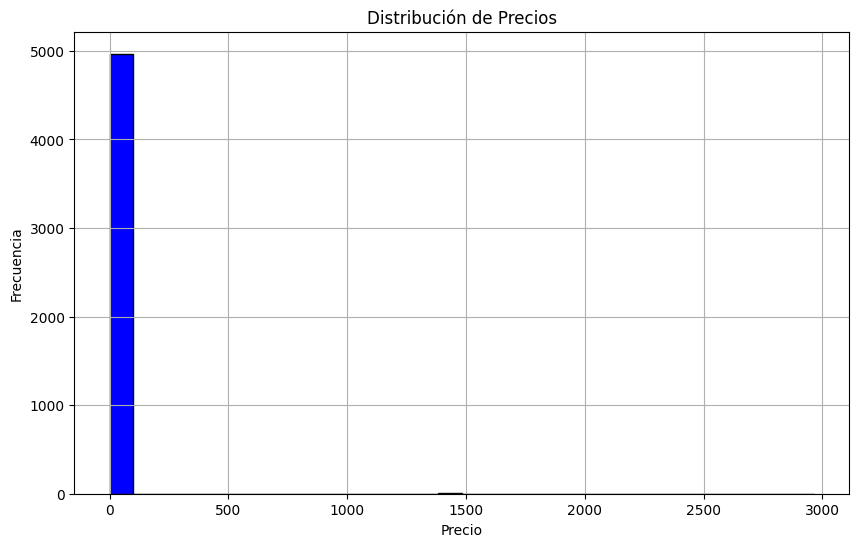

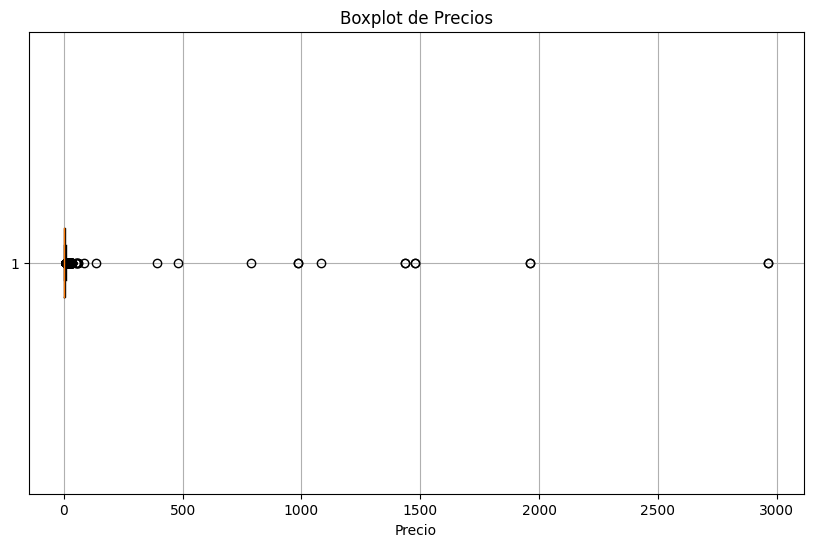

{'Número de Filas': 4983,
 'Número de Columnas': 11,
 'Precio Máximo': 2965.05,
 'Precio Mínimo': 0.17,
 'Precio Promedio': 7.4998053381497085,
 'Varianza de Precios': 7579.217142736087,
 'Número de Categorías': 409,
 'Número de Subcategorías': 146}

In [ ]:
num_rows, num_columns = mercadona_data.shape

price_stats = mercadona_data['Precio'].describe()
price_max = price_stats['max']
price_min = price_stats['min']
price_mean = price_stats['mean']
price_var = mercadona_data['Precio'].var()

num_categories = mercadona_data['categoria_producto'].nunique()
num_subcategories = mercadona_data['subcategoria'].nunique()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(mercadona_data['Precio'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(mercadona_data['Precio'], vert=False)
plt.title('Boxplot de Precios')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

eda_summary = {
    'Número de Filas': num_rows,
    'Número de Columnas': num_columns,
    'Precio Máximo': price_max,
    'Precio Mínimo': price_min,
    'Precio Promedio': price_mean,
    'Varianza de Precios': price_var,
    'Número de Categorías': num_categories,
    'Número de Subcategorías': num_subcategories
}

eda_summary

Mediante el BOXPLOT se aprecia que existen outlayers o valores erroneos

In [ ]:
top_15 = mercadona_data.nlargest(15, 'Precio')[['Nombre', 'Precio']]
top_15

,Nombre,Precio
2007,Alistado mediano congelado,2965.05
4069,Alistado mediano congelado,2965.05
2020,Bocas de cangrejo pequeñas congeladas,1960.20
4085,Bocas de cangrejo pequeñas congeladas,1960.20
2010,Gamba arrocera Hacendado congelada,1480.05
4074,Gamba arrocera Hacendado congelada,1480.05
2005,Alistado pequeño congelado,1435.50
4090,Alistado pequeño congelado,1435.50
4071,Langostino cocido,1084.05
2003,Gambón congelado,985.05


In [ ]:
mercadona_data = mercadona_data[mercadona_data['Precio'] < 787.05]

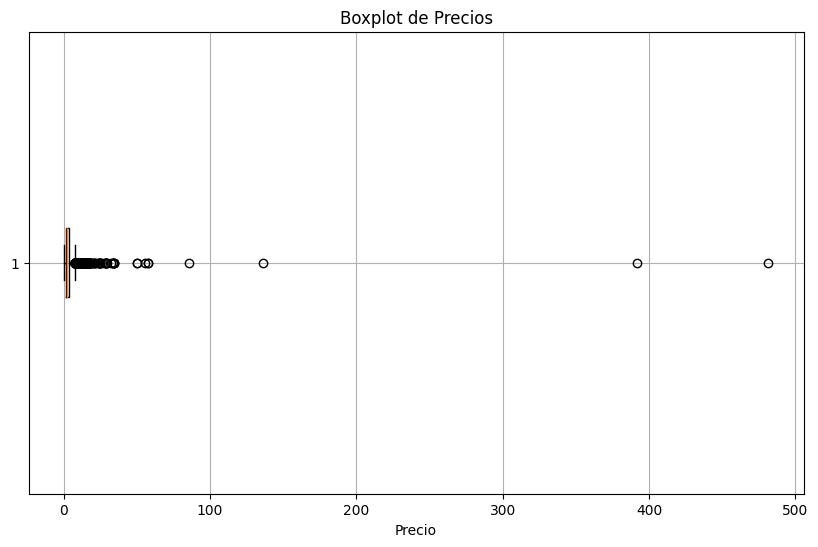

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(mercadona_data['Precio'], vert=False)
plt.title('Boxplot de Precios')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

In [ ]:
Precio_max = mercadona_data['Precio'].max()
Precio_min = mercadona_data['Precio'].min()

In [ ]:
Precio_max

481.5

In [ ]:
Precio_min

0.17

In [29]:
def calculate_iqr_with_coefficient(df, column, coefficient):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    adjusted_IQR = IQR * coefficient
    return adjusted_IQR

coefficient = 6

adjusted_iqr = calculate_iqr_with_coefficient(mercadona_data, 'Precio', coefficient)
adjusted_iqr

14.399999999999999

In [30]:
# Calculate the limits to identify the outliers
Q1 = mercadona_data['Precio'].quantile(0.25)
Q3 = mercadona_data['Precio'].quantile(0.75)
lower_bound = Q1 - adjusted_iqr
upper_bound = Q3 + adjusted_iqr

# Filter the data to remove values outside the limits
filtered_data = mercadona_data[(mercadona_data['Precio'] >= lower_bound) & (mercadona_data['Precio'] <= upper_bound)]

filtered_data.head(), filtered_data.shape

(   ID_cat           subcategoria  ID_subcat categoria_producto  ID_pro  \
 0     112  Aceite, vinagre y sal        420    Aceite de oliva  4240.0   
 2     112  Aceite, vinagre y sal        420    Aceite de oliva  4740.0   
 3     112  Aceite, vinagre y sal        420    Aceite de oliva  4706.0   
 4     112  Aceite, vinagre y sal        420    Aceite de oliva  4640.0   
 6     112  Aceite, vinagre y sal        420    Aceite de oliva  4749.0   
 
                                               Nombre  Precio  Precio_unidad  \
 0                     Aceite de oliva 0,4º Hacendado    8.00           8.00   
 2             Aceite de oliva virgen extra Hacendado    9.65           9.65   
 3  Aceite de oliva virgen extra Hacendado Gran Se...    8.10          10.80   
 4                       Aceite de oliva 1º Hacendado    8.00           8.00   
 6                   Aceite de oliva virgen Hacendado    8.95           8.95   
 
   Unidad_medida Fecha_actual         Marca  
 0             l   2

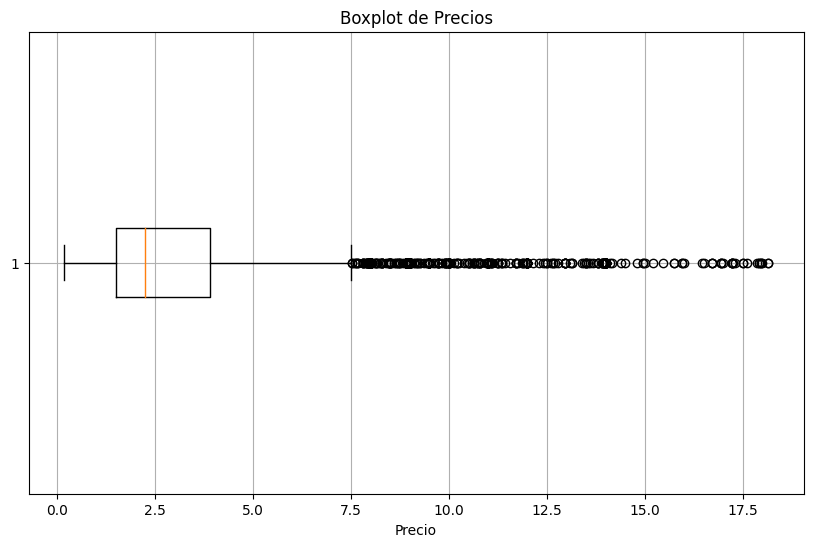

In [31]:
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['Precio'], vert=False)
plt.title('Boxplot de Precios')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

Ahora sí que tenemos la distribución más homogenea.

In [35]:
num_categorias = mercadona_data['subcategoria'].nunique()
num_subcategorias = mercadona_data['categoria_producto'].nunique()
print(f"Hay {num_categorias} categorias principales")
print(f"Hay {num_subcategorias} subcategorias")

Hay 146 categorias principales
Hay 409 subcategorias
